<a href="https://colab.research.google.com/github/Rabea766/data-analysis/blob/main/movie_corr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#import the packages we will use in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#read the data
df=pd.read_excel('/content/movies.xlsx')

In [112]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [113]:

df['correct_year'] = df['released'].astype(str).str.extract('(\d{4})')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2659246261.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['correct_year'] = df['released'].astype(str).str.extract('(\d{4})')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [34]:
#check if we have any missing value

df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [37]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [39]:
colm={'rating','released','score','votes','writer','star','country','budget','gross','company','runtime'}

In [41]:
for col in colm:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-2774081791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2774081791.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [42]:
#check if we have any missing value yet

df.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


In [44]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


<Axes: >

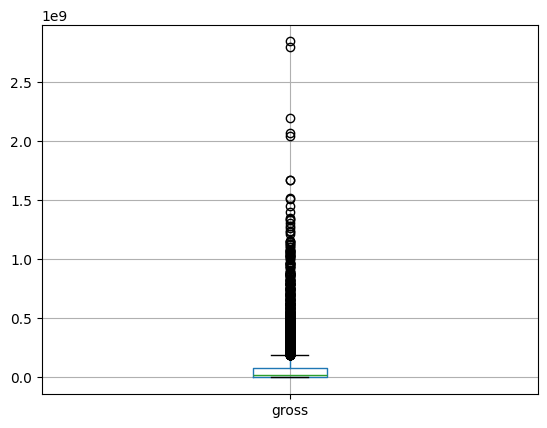

In [103]:
#are there any outliers
df.boxplot(column=['gross'])

In [45]:
df['budget']=df['budget'].astype('int64')

In [46]:
df['budget']

,budget
0,19000000
1,4500000
2,18000000
3,3500000
4,6000000
...,...
7663,7000
7664,35589876
7665,58750
7666,15000


In [47]:
df['gross']=df['gross'].astype('int64')
df['gross']

,gross
0,46998772
1,58853106
2,538375067
3,83453539
4,39846344
...,...
7663,78500541
7664,78500541
7665,78500541
7666,78500541


In [52]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,IshirÃ´ Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [59]:
df['company'].drop_duplicates().sort_values(ascending=False)

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
6420,erbp
3776,double A Films
524,Zupnik-Curtis Enterprises
3330,Zucker Brothers Productions
146,Zoetrope Studios


In [55]:
#check if we have any duplicat
df.duplicated().sum()

np.int64(0)

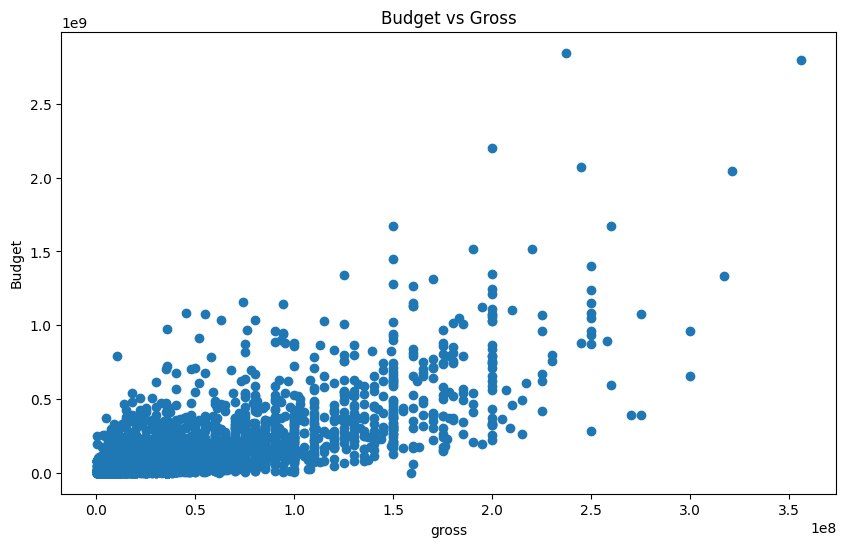

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('gross')
plt.ylabel('Budget')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

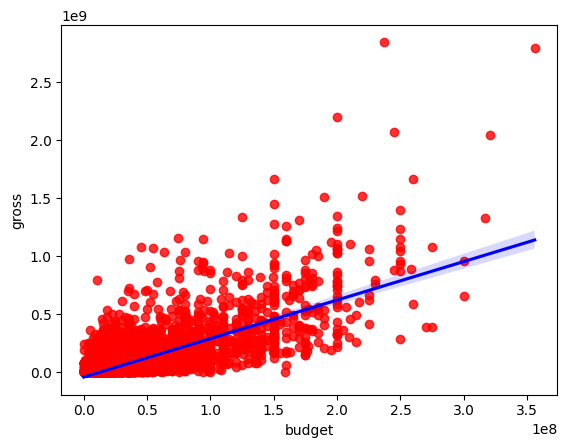

In [67]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

<Axes: xlabel='score', ylabel='gross'>

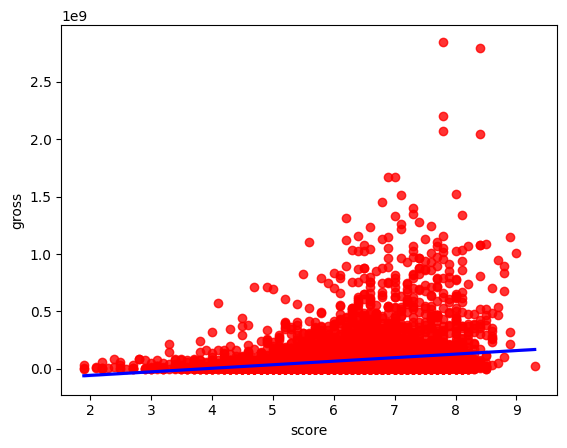

In [105]:
sns.regplot(x="score", y="gross", data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [75]:
cooreatho=df.corr(numeric_only=True,method='pearson')

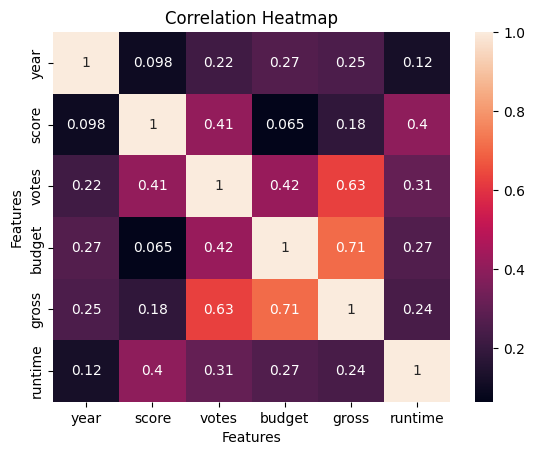

In [77]:
sns.heatmap(cooreatho,annot=True)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [86]:

df_numerc=df
for col_name in df_numerc.columns:
  if df_numerc[col_name].dtype=='object':
    df_numerc[col_name]=df_numerc[col_name].astype('category')
    df_numerc[col_name]=df_numerc[col_name].cat.codes

df_numerc.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


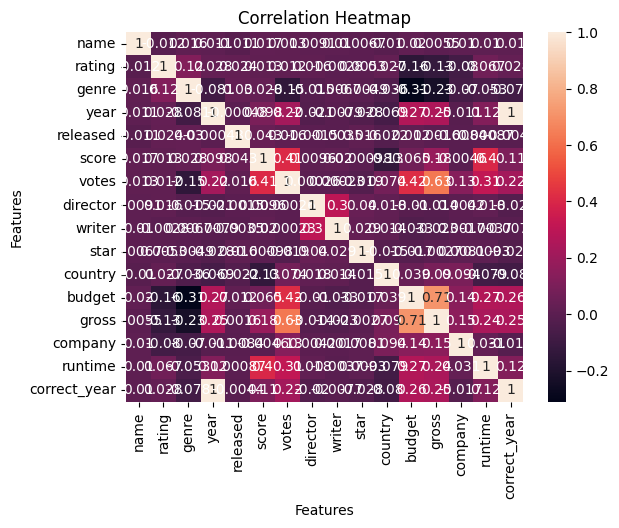

In [93]:
cooreatho=df.corr(numeric_only=True,method='pearson')
sns.heatmap(cooreatho,annot=True)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [94]:
df_numerc.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.012453,0.016334,0.011440,-0.011093,0.017093,0.013080,0.009071,0.009999,0.006742,-0.010425,0.020366,0.005457,0.010380,0.010394,0.010366
rating,-0.012453,1.000000,0.123465,0.027931,0.023643,0.013246,0.012378,0.016255,-0.002794,0.005314,0.026930,-0.156544,-0.130083,-0.079626,0.066641,0.028017
genre,0.016334,0.123465,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006744,-0.004856,-0.035896,-0.310566,-0.230267,-0.070013,-0.052699,-0.078120
year,0.011440,0.027931,-0.081261,1.000000,-0.000484,0.097936,0.222810,-0.020795,-0.007899,-0.027745,-0.069423,0.265578,0.252042,-0.011438,0.120766,0.996802
released,-0.011093,0.023643,0.029997,-0.000484,1.000000,0.042617,0.016114,-0.001492,-0.003460,0.015550,-0.022042,0.012267,0.001637,-0.008443,0.000867,-0.004379
score,0.017093,0.013246,0.027959,0.097936,0.042617,1.000000,0.409182,0.009559,0.019794,-0.000979,-0.134577,0.064541,0.182868,-0.004594,0.399329,0.106144
votes,0.013080,0.012378,-0.145276,0.222810,0.016114,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,0.130638,0.309166,0.218229
director,0.009071,0.016255,-0.015258,-0.020795,-0.001492,0.009559,0.000260,1.000000,0.299511,0.039715,0.017926,-0.010364,-0.014272,0.004250,0.017624,-0.020399
writer,0.009999,-0.002794,0.006744,-0.007899,-0.003460,0.019794,0.000232,0.299511,1.000000,0.028745,0.014411,-0.033218,-0.023186,0.001665,-0.003699,-0.007693
star,0.006742,0.005314,-0.004856,-0.027745,0.015550,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.008072,0.009273,-0.028117


In [98]:
correthio_mat=df_numerc.corr()
correthio_pairs=correthio_mat.unstack()
correthio_pairs

name          name            1.000000
              rating         -0.012453
              genre           0.016334
              year            0.011440
              released       -0.011093
              score           0.017093
              votes           0.013080
              director        0.009071
              writer          0.009999
              star            0.006742
              country        -0.010425
              budget          0.020366
              gross           0.005457
              company         0.010380
              runtime         0.010394
              correct_year    0.010366
rating        name           -0.012453
              rating          1.000000
              genre           0.123465
              year            0.027931
              released        0.023643
              score           0.013246
              votes           0.012378
              director        0.016255
              writer         -0.002794
              star            0.005314
              country         0.026930
              budget         -0.156544
              gross          -0.130083
              company        -0.079626
              runtime         0.066641
              correct_year    0.028017
genre         name            0.016334
              rating          0.123465
              genre           1.000000
              year           -0.081261
              released        0.029997
              score           0.027959
              votes          -0.145276
              director       -0.015258
              writer          0.006744
              star           -0.004856
              country        -0.035896
              budget         -0.310566
              gross          -0.230267
              company        -0.070013
              runtime        -0.052699
              correct_year   -0.078120
year          name            0.011440
              rating          0.027931
              genre          -0.081261
              year            1.000000
              released       -0.000484
              score           0.097936
              votes           0.222810
              director       -0.020795
              writer         -0.007899
              star           -0.027745
              country        -0.069423
              budget          0.265578
              gross           0.252042
              company        -0.011438
              runtime         0.120766
              correct_year    0.996802
released      name           -0.011093
              rating          0.023643
              genre           0.029997
              year           -0.000484
              released        1.000000
              score           0.042617
              votes           0.016114
              director       -0.001492
              writer         -0.003460
              star            0.015550
              country        -0.022042
              budget          0.012267
              gross           0.001637
              company        -0.008443
              runtime         0.000867
              correct_year   -0.004379
score         name            0.017093
              rating          0.013246
              genre           0.027959
              year            0.097936
              released        0.042617
              score           1.000000
              votes           0.409182
              director        0.009559
              writer          0.019794
              star           -0.000979
              country        -0.134577
              budget          0.064541
              gross           0.182868
              company        -0.004594
              runtime         0.399329
              correct_year    0.106144
votes         name            0.013080
              rating          0.012378
              genre          -0.145276
              year            0.222810
              released        0.016114
              score           0.409182
              votes   

In [100]:
sorted_correthio=correthio_pairs.sort_values()
sorted_correthio

,,0
genre,budget,-0.310566
budget,genre,-0.310566
gross,genre,-0.230267
genre,gross,-0.230267
rating,budget,-0.156544
budget,rating,-0.156544
votes,genre,-0.145276
genre,votes,-0.145276
country,score,-0.134577
score,country,-0.134577


In [102]:
# now take a look at the ones that have a high correlation (> 0.5)
high_corr=sorted_correthio[(sorted_correthio) > 0.5 ]
high_corr

,,0
gross,votes,0.628713
votes,gross,0.628713
gross,budget,0.711270
budget,gross,0.711270
year,correct_year,0.996802
correct_year,year,0.996802
director,director,1.000000
votes,votes,1.000000
released,released,1.000000
score,score,1.000000
